# Pandas Data Structures
## Series

In [1]:
import pandas as pd
s = pd.Series([3,-5,7,4], index=['a', 'b', 'c', 'd'])
s

a    3
b   -5
c    7
d    4
dtype: int64

## DataFrame

In [2]:
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]}
data

{'Country': ['Belgium', 'India', 'Brazil'],
 'Capital': ['Brussels', 'New Delhi', 'Brasília'],
 'Population': [11190846, 1303171035, 207847528]}

In [3]:
df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


# Selection
## Getting

In [4]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [5]:
s['b'] # Get one element

-5

In [6]:
df[1:] # Get subset of a DataFrame

,Country,Capital,Population
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


## Selecting, Boolean Indexing & Setting

### By Position

In [7]:
df.iloc[[0],[0]] # Select single value by row & column

,Country
0,Belgium


### By Label

In [8]:
df.loc[[0], ['Country']] # Select single value by row & column labels

,Country
0,Belgium


### Boolean Indexing

In [9]:
s > 1

a     True
b    False
c     True
d     True
dtype: bool

In [10]:
~(s > 1)

a    False
b     True
c    False
d    False
dtype: bool

In [11]:
s[~(s > 1)] # Series s where value is not >1

b   -5
dtype: int64

In [12]:
(s < -1)

a    False
b     True
c    False
d    False
dtype: bool

In [13]:
(s > 2)

a     True
b    False
c     True
d     True
dtype: bool

In [14]:
s[ (s < -1)  | (s > 2) ] # s where value is <-1 or >2

a    3
b   -5
c    7
d    4
dtype: int64

In [15]:
df # Use filter to adjust DataFrame

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [16]:
df['Population'] > 1200000000 

0    False
1     True
2    False
Name: Population, dtype: bool

### setting

In [17]:
s

a    3
b   -5
c    7
d    4
dtype: int64

In [18]:
s['a'] = 6 # Set index a of Series s to 6
s

a    6
b   -5
c    7
d    4
dtype: int64

# I/O
## Read and Write to CSV

In [19]:
pd.read_csv('mydata.csv', header=None, nrows=5)

,0,1,2,3
0,NaN,Country,Capital,Population
1,0.0,Belgium,Brussels,11190846
2,1.0,India,New Delhi,1303171035
3,2.0,Brazil,Brasília,207847528


In [20]:
df.to_csv('myDataFrame.csv')

## Read and Write to Excel

In [21]:
pd.read_excel('data.xlsx')

,Unnamed: 0,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528


In [22]:
df.to_excel('data.xlsx', sheet_name='Sheet1') 

In [23]:
xlsx = pd.ExcelFile('data.xlsx') #Read multiple sheets from the same file
df2 = pd.read_excel(xlsx, 'Sheet1')
df2

,Unnamed: 0,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528


## Read and Write to SQL Query or Database Table

In [24]:
from sqlalchemy import create_engine

In [25]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [26]:
# engine = create_engine('sqlite:///:memory:')
# pd.read_sql("SELECT * FROM my_table;", engine) # read_sql()is a convenience wrapper around read_sql_table() and read_sql_query()
# pd.read_sql_table('my_table', engine)
# pd.read_sql_query("SELECT * FROM my_table;", engine)

In [27]:
df.to_sql('my_table', engine)

NameError: name 'engine' is not defined

# Dropping

In [28]:
s

a    6
b   -5
c    7
d    4
dtype: int64

s.drop(['a','c']) # Drop values from rows (axis=0)

In [29]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [30]:
df.drop('Country', axis=1) # Drop values from columns(axis=1)

,Capital,Population
0,Brussels,11190846
1,New Delhi,1303171035
2,Brasília,207847528


## Sort & Rank

In [31]:
df.sort_index()# Sort by labels along an axis

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [32]:
df.sort_values(by='Country') # Sort by the values along an axis

,Country,Capital,Population
0,Belgium,Brussels,11190846
2,Brazil,Brasília,207847528
1,India,New Delhi,1303171035


In [33]:
df.rank() #Assign ranks to entries

,Country,Capital,Population
0,1.0,2.0,1.0
1,3.0,3.0,3.0
2,2.0,1.0,2.0


# Retrieving Series/DataFrame Information

## Basic Information

In [34]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [35]:
df.shape #(rows,columns)

(3, 3)

In [36]:
df.index #Describe index

RangeIndex(start=0, stop=3, step=1)

In [37]:
df.columns #Describe DataFrame columns

Index(['Country', 'Capital', 'Population'], dtype='object')

In [38]:
df.info() #Info on DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     3 non-null      object
 1   Capital     3 non-null      object
 2   Population  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [39]:
df.count() #Number of non-NA values

Country       3
Capital       3
Population    3
dtype: int64

## Summary

In [40]:
df.sum() #Sum of values

Country              BelgiumIndiaBrazil
Capital       BrusselsNew DelhiBrasília
Population                   1522209409
dtype: object

In [41]:
df.cumsum() #Cummulative sum of values

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,BelgiumIndia,BrusselsNew Delhi,1314361881
2,BelgiumIndiaBrazil,BrusselsNew DelhiBrasília,1522209409


In [42]:
df.min() #Minimum values

Country        Belgium
Capital       Brasília
Population    11190846
dtype: object

In [43]:
df.max() #maximum values

Country            India
Capital        New Delhi
Population    1303171035
dtype: object

In [44]:
df.describe() #Summary statistics

,Population
count,3.000000e+00
mean,5.074031e+08
std,6.961346e+08
min,1.119085e+07
25%,1.095192e+08
50%,2.078475e+08
75%,7.555093e+08
max,1.303171e+09


In [45]:
df.mean() #Mean of values

Population    5.074031e+08
dtype: float64

In [46]:
df.median() #Median of values

Population    207847528.0
dtype: float64

# Applying Functions

In [47]:
f = lambda x: x*2
df.apply(f) # Apply function

,Country,Capital,Population
0,BelgiumBelgium,BrusselsBrussels,22381692
1,IndiaIndia,New DelhiNew Delhi,2606342070
2,BrazilBrazil,BrasíliaBrasília,415695056


In [48]:
df.applymap(f) ##Apply function element-wise

,Country,Capital,Population
0,BelgiumBelgium,BrusselsBrussels,22381692
1,IndiaIndia,New DelhiNew Delhi,2606342070
2,BrazilBrazil,BrasíliaBrasília,415695056


# Data Alignment
## Internal Data Alignment
### NA values are introduced in the indices that don’t overlap:

In [49]:
s3 = pd.Series([7,-2,3], index=['a','c','d'])
s3

a    7
c   -2
d    3
dtype: int64

In [50]:
s

a    6
b   -5
c    7
d    4
dtype: int64

In [51]:
s + s3

a    13.0
b     NaN
c     5.0
d     7.0
dtype: float64

## Arithmetic Operations with Fill Methods
### You can also do the internal data alignment yourself with the help of the fill methods:

In [52]:
s.add(s3, fill_value=0)

a    13.0
b    -5.0
c     5.0
d     7.0
dtype: float64

In [53]:
s.sub(s3, fill_value=2)

a   -1.0
b   -7.0
c    9.0
d    1.0
dtype: float64

In [54]:
s.div(s3, fill_value=4)

a    0.857143
b   -1.250000
c   -3.500000
d    1.333333
dtype: float64

In [55]:
s.mul(s3, fill_value=3)

a    42.0
b   -15.0
c   -14.0
d    12.0
dtype: float64

# Reshaping Data
## Pivot

In [56]:
df2 = pd.read_csv('data.csv')
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [57]:
df3 = df2.pivot(index='Date', columns='Type', values='Value') #Spread rows into columns
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


## Pivot Table

In [58]:
df4 = pd.pivot_table(df2, values='Value', index='Date', columns='Type') # Spread rows into columns
df4

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


## Stack / Unstack

In [59]:
#stacked = df5.stack() #Pivot a level of column labels

In [60]:
#stacked.unstack() #Pivot a level of index labels

## Melt

In [61]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [62]:
pd.melt(df2,
       id_vars=["Date"],
       value_vars=["Type", "Value"],
       value_name="Observations") # Gather columns into rows

,Date,variable,Observations
0,2016-03-01,Type,a
1,2016-03-02,Type,b
2,2016-03-01,Type,c
3,2016-03-03,Type,a
4,2016-03-02,Type,a
5,2016-03-03,Type,c
6,2016-03-01,Value,11.432
7,2016-03-02,Value,13.031
8,2016-03-01,Value,20.784
9,2016-03-03,Value,99.906


# Iteration

In [63]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [64]:
df.iteritems() # (Column-index, Series) pairs

<generator object DataFrame.iteritems at 0x7f3624f41120>

In [65]:
df.iterrows() # (Row-index, Series) pairs

<generator object DataFrame.iterrows at 0x7f3624f41900>

# Advanced Indexing
## Selecting

In [66]:
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [67]:
df3 > 1

Type,a,b,c
Date,,,
2016-03-01,True,False,True
2016-03-02,True,True,False
2016-03-03,True,False,True


In [68]:
(df3>1).any()

Type
 a    True
 b    True
 c    True
dtype: bool

In [69]:
df3.loc[:,(df3>1).any()] # Select cols with any vals >1

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [70]:
df3.loc[:,(df3>1).all()] # Select cols with vals > 1

Type,a
Date,
2016-03-01,11.432
2016-03-02,1.303
2016-03-03,99.906


In [71]:
df3.isnull().any()

Type
 a    False
 b     True
 c     True
dtype: bool

In [72]:
df3.loc[:,df3.isnull().any()] # Select cols with NaN

Type,b,c
Date,,
2016-03-01,NaN,20.784
2016-03-02,13.031,NaN
2016-03-03,NaN,20.784


In [73]:
df3.notnull().all()

Type
 a     True
 b    False
 c    False
dtype: bool

In [74]:
df3.loc[:,df3.notnull().all()] # Select cols without NaN

Type,a
Date,
2016-03-01,11.432
2016-03-02,1.303
2016-03-03,99.906


## Indexing With isin

In [75]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [76]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [77]:
df.Country.isin(df2.Type) 

0    False
1    False
2    False
Name: Country, dtype: bool

In [78]:
df[(df.Country.isin(df2.Type))] # Find same elements

,Country,Capital,Population


In [79]:
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [80]:
df3.filter(items=["a","b"]) #Filter on values

Type
Date
2016-03-01
2016-03-02
2016-03-03


In [81]:
# df.select(lambda x : not x%5) #Select specific elements

## Where

In [82]:
s

a    6
b   -5
c    7
d    4
dtype: int64

In [83]:
s.where(s > 0) # Subset the data

a    6.0
b    NaN
c    7.0
d    4.0
dtype: float64

## Query

In [84]:
# df6.query('second > first') #Query DataFrame

## Setting/Resetting Index

In [85]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [86]:
df.set_index('Country') # Set the index

,Capital,Population
Country,,
Belgium,Brussels,11190846
India,New Delhi,1303171035
Brazil,Brasília,207847528


In [87]:
df4 = df.reset_index() # Reset the index
df4

,index,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528


In [88]:
# Rename DataFrame
df = df.rename(index=str,
               columns={"Country":"cntry",
                        "Capital":"cptl",
                        "Population":"ppltn"})
df

,cntry,cptl,ppltn
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


# Reindexing

In [89]:
s

a    6
b   -5
c    7
d    4
dtype: int64

In [90]:
s2 = s.reindex(['a','c','d','e','b'])
s2

a    6.0
c    7.0
d    4.0
e    NaN
b   -5.0
dtype: float64

### Forward Filling

In [91]:
range(4)

range(0, 4)

In [92]:
# df.reindex(range(4), method='ffill')

In [93]:
# s3 = s.reindex(range(5), method='bfill')

# MultiIndexing

In [94]:
import numpy as np

arrays = [ np.array([1,2,3]), np.array([5,4,3]) ]
arrays

[array([1, 2, 3]), array([5, 4, 3])]

In [95]:
np.random.rand(3,2)

array([[0.64677381, 0.84407242],
       [0.74711099, 0.17400052],
       [0.69330007, 0.69674159]])

In [98]:
df5 = pd.DataFrame(np.random.rand(3,2), index=arrays)
df5

,,0,1
1,5,0.686793,0.210347
2,4,0.651420,0.991148
3,3,0.383116,0.331931


In [101]:
zip(*arrays)

In [102]:
tuples = list(zip(*arrays))
tuples

[(1, 5), (2, 4), (3, 3)]

In [103]:
index = pd.MultiIndex.from_tuples(tuples,
                                 name=['first', 'second'])
index

MultiIndex([(1, 5),
            (2, 4),
            (3, 3)],
           names=['first', 'second'])

In [104]:
df6 = pd.DataFrame(np.random.rand(3,2), index=index)
df6

,,0,1
first,second,,
1,5,0.035144,0.959108
2,4,0.950922,0.231808
3,3,0.785957,0.946939


In [105]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [107]:
df2.set_index(["Date", "Type"])

,,Value
Date,Type,
2016-03-01,a,11.432
2016-03-02,b,13.031
2016-03-01,c,20.784
2016-03-03,a,99.906
2016-03-02,a,1.303
2016-03-03,c,20.784


# Duplicate Data

In [109]:
s3

a    7
c   -2
d    3
dtype: int64

In [110]:
s3.unique() #Return unique values

array([ 7, -2,  3])

In [111]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [112]:
df2.duplicated('Type') #Check duplicates

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [113]:
df2.drop_duplicates('Type', keep='last') #Drop duplicates

,Date,Type,Value
1,2016-03-02,b,13.031
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [114]:
df.index

Index(['0', '1', '2'], dtype='object')

In [115]:
df.index.duplicated() #Check index duplicates

array([False, False, False])

# Grouping Data
## Aggregation

In [116]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [119]:
df2.groupby(by=['Date', 'Type']).mean()

Value
Date       Type        
2016-03-01  a    11.432
            c    20.784
2016-03-02  a     1.303
            b    13.031
2016-03-03  a    99.906
            c    20.784

In [120]:
df4

,index,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528


In [123]:
df4.groupby(level=0).sum()

,index,Population
0,0,11190846
1,1,1303171035
2,2,207847528


In [127]:
# df4.groupby(level=0).agg({'a':lambda x:sum(x)/len(x),'b': np.sum})

SpecificationError: Column(s) ['a', 'b'] do not exist

## Transformation

In [129]:
customSum = lambda x: (x+x%2)

<function __main__.<lambda>(x)>

In [130]:
df4

,index,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528


In [131]:
df4.groupby(level=0).transform(customSum)

,index,Population
0,0,11190846
1,2,1303171036
2,2,207847528


## Missing Data

In [137]:
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [136]:
df3.dropna() #Drop NaN values

Type,a,b,c
Date,,,


In [138]:
df3.mean()

Type
 a    37.547
 b    13.031
 c    20.784
dtype: float64

In [139]:
df3.fillna(df3.mean()) # Fill NaN values with a predetermined value

Type,a,b,c
Date,,,
2016-03-01,11.432,13.031,20.784
2016-03-02,1.303,13.031,20.784
2016-03-03,99.906,13.031,20.784


In [140]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [144]:
df2.replace('a', 'f') #Replace values with others

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


# Combining Data
## Merge

In [161]:
data1_dic = [{'X1': 'a', 'X2': 11.432},
             {'X1': 'b', 'X2': 1.303},
             {'X1': 'c', 'X2': 99.906}]
data1 = pd.DataFrame(data1_dic)
data1

,X1,X2
0,a,11.432
1,b,1.303
2,c,99.906


In [162]:
data2_dic = [{'X1': 'a', 'X2': 20.784},
             {'X1': 'b', 'X2': 'NaN'},
             {'X1': 'd', 'X2': 20.784}]
data2 = pd.DataFrame(data2_dic)
data2

,X1,X2
0,a,20.784
1,b,NaN
2,d,20.784


In [163]:
pd.merge(data1, data2, how='left', on='X1')

,X1,X2_x,X2_y
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN


In [164]:
pd.merge(data1, data2, how='right', on='X1')

,X1,X2_x,X2_y
0,a,11.432,20.784
1,b,1.303,NaN
2,d,NaN,20.784


In [165]:
pd.merge(data1, data2, how='inner', on='X1')

,X1,X2_x,X2_y
0,a,11.432,20.784
1,b,1.303,NaN


In [166]:
pd.merge(data1, data2, how='outer', on='X1')

,X1,X2_x,X2_y
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN
3,d,NaN,20.784


## Join 

In [170]:
# data1.join(data2, how='right')

## Concatenate
### Vertical

In [173]:
s, s2

(a    6
 b   -5
 c    7
 d    4
 dtype: int64, a    6.0
 c    7.0
 d    4.0
 e    NaN
 b   -5.0
 dtype: float64)

In [172]:
s.append(s2)

a    6.0
b   -5.0
c    7.0
d    4.0
a    6.0
c    7.0
d    4.0
e    NaN
b   -5.0
dtype: float64

### Horizontal/Vertical

In [174]:
pd.concat([s,s2], axis=1, keys=['One', 'Two'])

,One,Two
a,6.0,6.0
b,-5.0,-5.0
c,7.0,7.0
d,4.0,4.0
e,NaN,NaN


In [176]:
data1, data2

(  X1      X2
 0  a  11.432
 1  b   1.303
 2  c  99.906,   X1      X2
 0  a  20.784
 1  b     NaN
 2  d  20.784)

In [177]:
pd.concat([data1, data2], axis=1, join='inner')

,X1,X2,X1,X2
0,a,11.432,a,20.784
1,b,1.303,b,NaN
2,c,99.906,d,20.784


# Dates

In [178]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [184]:
df2['Date']

0    2016-03-01
1    2016-03-02
2    2016-03-01
3    2016-03-03
4    2016-03-02
5    2016-03-03
Name: Date, dtype: object

In [185]:
pd.to_datetime(df2['Date'])

0   2016-03-01
1   2016-03-02
2   2016-03-01
3   2016-03-03
4   2016-03-02
5   2016-03-03
Name: Date, dtype: datetime64[ns]

In [186]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [187]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [190]:
df2['Date'] = pd.date_range('2000-1-1', periods=6, freq='M')

In [191]:
df2

,Date,Type,Value
0,2000-01-31,a,11.432
1,2000-02-29,b,13.031
2,2000-03-31,c,20.784
3,2000-04-30,a,99.906
4,2000-05-31,a,1.303
5,2000-06-30,c,20.784


In [196]:
from datetime import datetime

dates = [datetime(2012,5,1), datetime(2012,5,2)]
dates


[datetime.datetime(2012, 5, 1, 0, 0), datetime.datetime(2012, 5, 2, 0, 0)]

In [198]:
index = pd.DatetimeIndex(dates)
index

DatetimeIndex(['2012-05-01', '2012-05-02'], dtype='datetime64[ns]', freq=None)

In [200]:
# index = pd.date_range(datetime(2012,2,1), end, freq='BM')

NameError: name 'end' is not defined

# Visualization

In [203]:
import matplotlib.pyplot as plt

s

a    6
b   -5
c    7
d    4
dtype: int64

<AxesSubplot:>

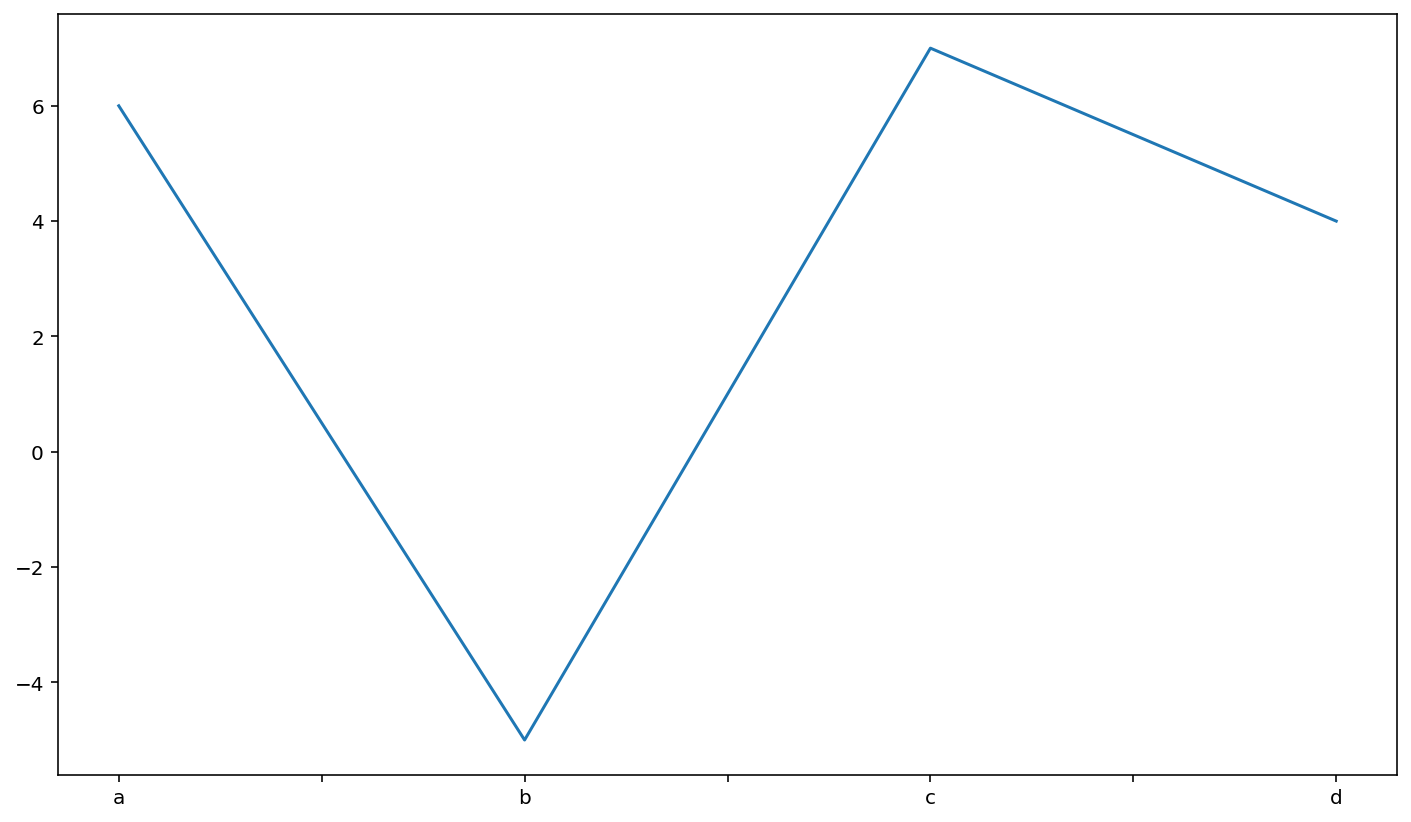

In [204]:
s.plot()

In [205]:
plt.show()

In [206]:
df2

,Date,Type,Value
0,2000-01-31,a,11.432
1,2000-02-29,b,13.031
2,2000-03-31,c,20.784
3,2000-04-30,a,99.906
4,2000-05-31,a,1.303
5,2000-06-30,c,20.784


<AxesSubplot:>

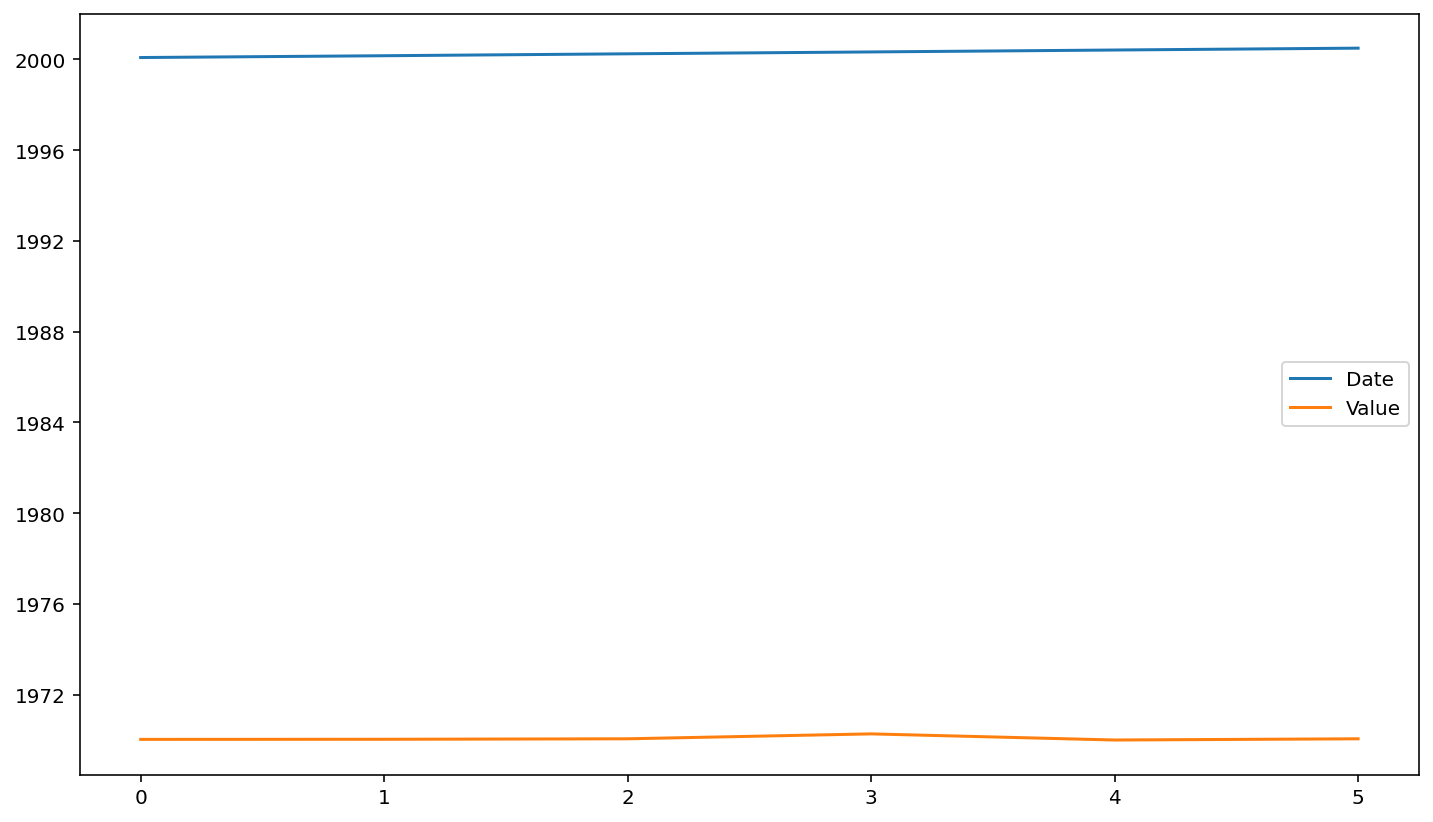

In [207]:
df2.plot()

In [208]:
plt.show()